In [1]:
##Panel Regression

In [10]:
!pip install linearmodels

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/f3/3d/5e9b094c323506e15958bf0c9352d616ca6aa9582017f2dc81a062662a0e/linearmodels-4.14-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/96/84cf406fe7d589f3dba9fc0f737e65985a3526c6d8c783f02d4b5a10825d/numpy-1.16.6-cp27-cp27m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c0/11/6e91ff5fe0476492f023cebad434a1a34fc513cfa98ddb1f3e5c856d2d99/property_cached-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/52/ff/912fe03a623a70bcf297d466013a0b4f4c68c3b60f86bf226682d061fc09/pandas-0.24.2-cp27-cp27m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/53/1c/b83f6a4632b502a20b0f83bc5c25ebfa03eebd00efe9b45fcdcde1a0ab40/statsmodels-0.11.0.tar.gz
    Complete output from command python setup.py egg_info:
 

In [1]:
#pip install --upgrade pip

#time dimension comes in 

random effect -> within and between estimations
the fixed -> it captures variable do not change over time at different level -> use it if var are corr
random effect -> unobserved var are not corr we use random effect 

all the different factors 
fixed-> what do not observed is not correlated ?

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
from linearmodels import RandomEffects

In [16]:
from linearmodels.datasets import jobtraining
data = jobtraining.load()
year = pd.Categorical(data.year)
data = data.set_index(['fcode','year']) #set the index, function from pd ß
data['year'] = year 


In [13]:
print(data)
#clscrap -> you can not sell it becasuse its not good quality
#cgrant -> you recieve a grant or not


             employ       sales   avgsal  scrap  rework  tothrs  union  grant  \
fcode  year                                                                     
410032 1987   100.0  47000000.0  35000.0    NaN     NaN    12.0      0      0   
       1988   131.0  43000000.0  37000.0    NaN     NaN     8.0      0      0   
       1989   123.0  49000000.0  39000.0    NaN     NaN     8.0      0      0   
410440 1987    12.0   1560000.0  10500.0    NaN     NaN    12.0      0      0   
       1988    13.0   1970000.0  11000.0    NaN     NaN    12.0      0      0   
...             ...         ...      ...    ...     ...     ...    ...    ...   
419483 1988   108.0  11500000.0  14810.0   25.0     NaN     0.0      1      0   
       1989   129.0  12000000.0  14227.0   30.0     NaN    20.0      1      0   
419486 1987    80.0   7000000.0  16000.0    NaN     NaN     0.0      0      0   
       1988    90.0   8500000.0  17000.0    NaN     NaN     0.0      0      0   
       1989   100.0   990000

# Random Effect Model

In [25]:
exog_vars = ['grant','employ']
exog = sm.add_constant(data[exog_vars])
mod = RandomEffects(data['clscrap'], exog) #RandomEffects(dependent,independent)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                clscrap   R-squared:                        0.0165
Estimator:              RandomEffects   R-squared (Between):              0.0314
No. Observations:                 105   R-squared (Within):               0.0015
Date:                Mon, Nov 16 2020   R-squared (Overall):              0.0199
Time:                        14:52:16   Log-likelihood                   -77.721
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.8542
Entities:                          53   P-value                           0.4286
Avg Obs:                       1.9811   Distribution:                   F(2,102)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             0.8634
                            

### explication
these are not correlated 
unobservable varaibles are not correlated 
it doesn't seem that there is a fixed effect 

model is not good for us 
panel regression 
the panel regrassion is not giving 
not good data to analyse the phenomenan that using -> data not enougth 
you need to change the model -> LSTL captures secontianiritv

#### SEE HOW TO REMOVE THE CONSTANT

# PanelOLS Estimation Summary        

Below the model is nothing more than an OLS, because entity_effects is False as default 

In [27]:
#attention the model is not good you need to be careful about fixed effects
#see next code 
mod2 = PanelOLS(data['clscrap'], exog) #RandomEffects(dependent,independent)
re_res = mod2.fit()
print(re_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                clscrap   R-squared:                        0.0205
Estimator:                   PanelOLS   R-squared (Between):              0.0362
No. Observations:                 105   R-squared (Within):              -0.0048
Date:                Mon, Nov 16 2020   R-squared (Overall):              0.0205
Time:                        14:59:22   Log-likelihood                   -91.226
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.0653
Entities:                          53   P-value                           0.3484
Avg Obs:                       1.9811   Distribution:                   F(2,102)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             1.0653
                            

In [29]:
mod3 = PanelOLS(data['clscrap'], exog, entity_effects = True) #RandomEffects(dependent,independent)
re_res = mod3.fit()
print(re_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                clscrap   R-squared:                        0.0142
Estimator:                   PanelOLS   R-squared (Between):             -0.0927
No. Observations:                 105   R-squared (Within):               0.0142
Date:                Mon, Nov 16 2020   R-squared (Overall):             -0.0529
Time:                        15:06:27   Log-likelihood                   -40.109
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.3590
Entities:                          53   P-value                           0.7001
Avg Obs:                       1.9811   Distribution:                    F(2,50)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             0.3590
                            

### include the fixed effect on your model -> ATTENTION

if you dont put it by default is false
putting true it captures fixed effect if there are any in the data set

there is no fixed effect in our data set 
but the model may not be a good fit

### Equivalence of fixed effects model and dummy variable regression

In [34]:
#fixed effect model is not more than adding a dummy to OLS model
data = jobtraining.load()
data.year = pd.Categorical(data.year)
FE_ols = smf.ols(formula= 'clscrap ~ 1 + grant + employ + C(fcode)', data = data).fit()
print(FE_ols.summary())
#be careful with R-square 

                            OLS Regression Results                            
Dep. Variable:                clscrap   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     1.577
Date:                Mon, 16 Nov 2020   Prob (F-statistic):             0.0529
Time:                        15:14:09   Log-Likelihood:                -40.109
No. Observations:                 105   AIC:                             190.2
Df Residuals:                      50   BIC:                             336.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0558      0

source: https://medium.com/pew-research-center-decoded/using-fixed-and-random-effects-models-for-panel-data-in-python-a795865736ab

# LOGIT

1- load the data header 0
2- drop NA
print shape
print the name of the fields

In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style= 'white')
sns.set(style='whitegrid', color_codes=True)

In [36]:
import csv

In [38]:
data = pd.read_csv('add the data set here')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [39]:
data['education']= np.where(data['education']== 'basic.9y','Basic',data['education'])
data['education']= np.where(data['education']== 'basic.6y','Basic',data['education'])
data['education']= np.where(data['education']== 'basic.4y','Basic',data['education'])
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [40]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

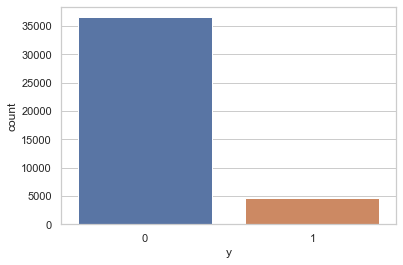

<Figure size 432x288 with 0 Axes>

In [49]:
sns.countplot(x= 'y' ,data = data)
plt.show()
plt.savefig('count_plot')

In [51]:
cat_vars= ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']

for var in cat_vars:
    car_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1= data.join(cat_list)
    data=data1

cat_vars= ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [52]:
print(data)

       age          job  marital            education  default housing loan  \
0       44  blue-collar  married                Basic  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married                Basic       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married                Basic  unknown      no   no   
41185   42       admin.   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  ...  month_oct 

In [65]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior. 

For example: https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

### Explication on logistic reg

Regression Y = AX + B

Logistic Function 1/(1+e^(-x)

Logistic Regression Y+ 1/(1+e^(AX + B)

you're putting regression in the logistic function

In [67]:
print(X.shape)
print(y.shape)

(41188, 61)
(41188, 1)


### be carefull with unbalanced datasets

In [68]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classification on test: {: .2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classification on test:  0.91


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10708   273]
 [  807   569]]


### confusion_matrix
positive negative the lignes reality, columns
true neg, true pos, false neg, false pos 

its unbalanced
more 0 s than 1
by having more 0 
100 lignes response var eather 0 and 1
learn 
accuriy will be 99% bcs of 
presition when 

In [71]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10981
           1       0.68      0.41      0.51      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



### precision = TP / (TP + FP)
### recall = TP / (TP+FN)
### f1-score = 2*(Recall*Precision) / (Recall+Precision)

sometimes you dont care avout precission, you care more about recall

#### why?
unflag something than chack
better to flag trop is ok -> BNP: 9 B euros due to failure in control 
we have to many false positive
if juste one further chacking 
it cost 2000 euros to checking 
but its cost you 9 billion euros 
you need to be carefull to result you have

ex: terrorist attackts, fraud 

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_curve(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'% logit_roc_auc
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc= 'lower right')
plt.savefig('Log_ROC')
plt.show()

SyntaxError: invalid syntax (<ipython-input-95-41504e730d24>, line 7)

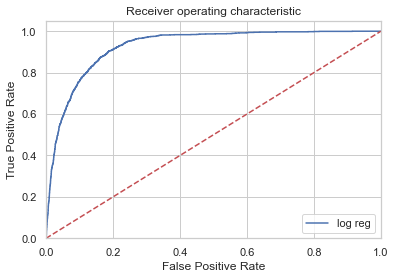

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_curve(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='log reg')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc= 'lower right')
plt.savefig('Log_ROC')
plt.show()